# Wine Classification using Linear Discriminant Analysis

### Table of Contents

#### 1. **Information**
    - Reason for Choosing this Dataset ?**
    - Source
    - Dstaset Information
    - Attribute Information
    - Objective

#### 2. **Loading Dataset**
    - Importing packages
    - Reading Data
    - Shape of data
    - Dtype

#### 3. **Data Cleansing & EDA**
    - Checking Null values
    - Descriptive Statistics
    - Correlation Plot
    - Bivariate Analysis

#### 4. **Normalization**

#### 5. **Modelling**
    - Decomposition by Linear Discriminant Analysis (LDA)
    - Logistic Regression Implementation
    - Evaluating Metrics (R2 and RMSLE)

#### 6. **Conclusion**

#### 7. **References**<br><br>

### Reason of Choosing Dataset ?

- For the purpose of applying Linear Discriminant Analysis I'm choosing this dataset.


- However, this Statistical models are not prepared to use for production environment.

### Source:

- Original Owners : 

    - Forina, M. et al, PARVUS - An Extendible Package for Data Exploration, Classification and Correlation. Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno, 16147 Genoa, Italy. 


- Donor : 
    - Stefan Aeberhard, email: stefan '@' coral.cs.jcu.edu.au


- Download :
    - https://archive.ics.uci.edu/ml/datasets/wine



### Data Set Information :

These data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars. The analysis determined the quantities of 13 constituents found in each of the three types of wines. 

I think that the initial data set had around 30 variables, but for some reason I only have the 13 dimensional version. I had a list of what the 30 or so variables were, but a.) I lost it, and b.), I would not know which 13 variables are included in the set. 

The attributes are (dontated by Riccardo Leardi, riclea '@' anchem.unige.it ) 

- Alcohol
- Malic acid 
- Ash 
- Alcalinity of ash 
- Magnesium 
- Total phenols 
- Flavanoids 
- Nonflavanoid phenols 
- Proanthocyanins 
- Color intensity 
- Hue 
- OD280/OD315 of diluted wines 
- Proline 

In a classification context, this is a well posed problem with "well behaved" class structures. A good data set for first testing of a new classifier, but not very challenging.

### Attribute Information :

- All attributes are continuous 


- No statistics available, but suggest to standardise variables for certain uses (e.g. for us with classifiers which are NOT scale invariant) 


- NOTE: 1st attribute is class identifier (1-3)

### Objective :

- The goal is to make some predictive models on a wine dataset by implementing Linear Discriminant Analysis, and reviewing some exploratory and modelling techiniques.

### Loading Data

In [0]:
#Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading feature names
#Reading data

names = ['Class', 'Alcohol', 'Malic acid', 'Ash',
         'Alcalinity of ash', 'Magnesium', 'Total phenols',
         'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
         'Color intensity', 'Hue','OD280/OD315 of diluted wines', 'Proline']

df = pd.read_csv('wine.data', names=names)
df.head()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [3]:
#data shape

df.shape

(178, 14)

- We've 178 Records & 14 Features (Including Target)

In [4]:
#Let us check datset's attribute info

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
Class                           178 non-null int64
Alcohol                         178 non-null float64
Malic acid                      178 non-null float64
Ash                             178 non-null float64
Alcalinity of ash               178 non-null float64
Magnesium                       178 non-null int64
Total phenols                   178 non-null float64
Flavanoids                      178 non-null float64
Nonflavanoid phenols            178 non-null float64
Proanthocyanins                 178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


- Above results shows us that we've :
    - **(3) x int64** datatype attributes
    - **(11) x float64** datatype attributes.

### EDA

- We'll perform Univariate and Bivariate Analysis.


- Visualizations are Key to Explore data so we'll plot some.


- We'll see if we've missing values.


- We'll look after Descriptive Stats.

In [5]:
#Examining Null values in each feature

df.isnull().any()

Class                           False
Alcohol                         False
Malic acid                      False
Ash                             False
Alcalinity of ash               False
Magnesium                       False
Total phenols                   False
Flavanoids                      False
Nonflavanoid phenols            False
Proanthocyanins                 False
Color intensity                 False
Hue                             False
OD280/OD315 of diluted wines    False
Proline                         False
dtype: bool

- We don't have null values in this dataset.

In [6]:
#descriptive stats

df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**Observations :**

- **Alcohol, Ash, Nonflavanoid phenols, Hue & OD280/OD315 of diluted wines** We can observe that there is not much of a variance in their Value count.


- While, rest of the feature have high variance with possible Outliers.  

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


Text(0.5, 1.0, 'Pair Plot')

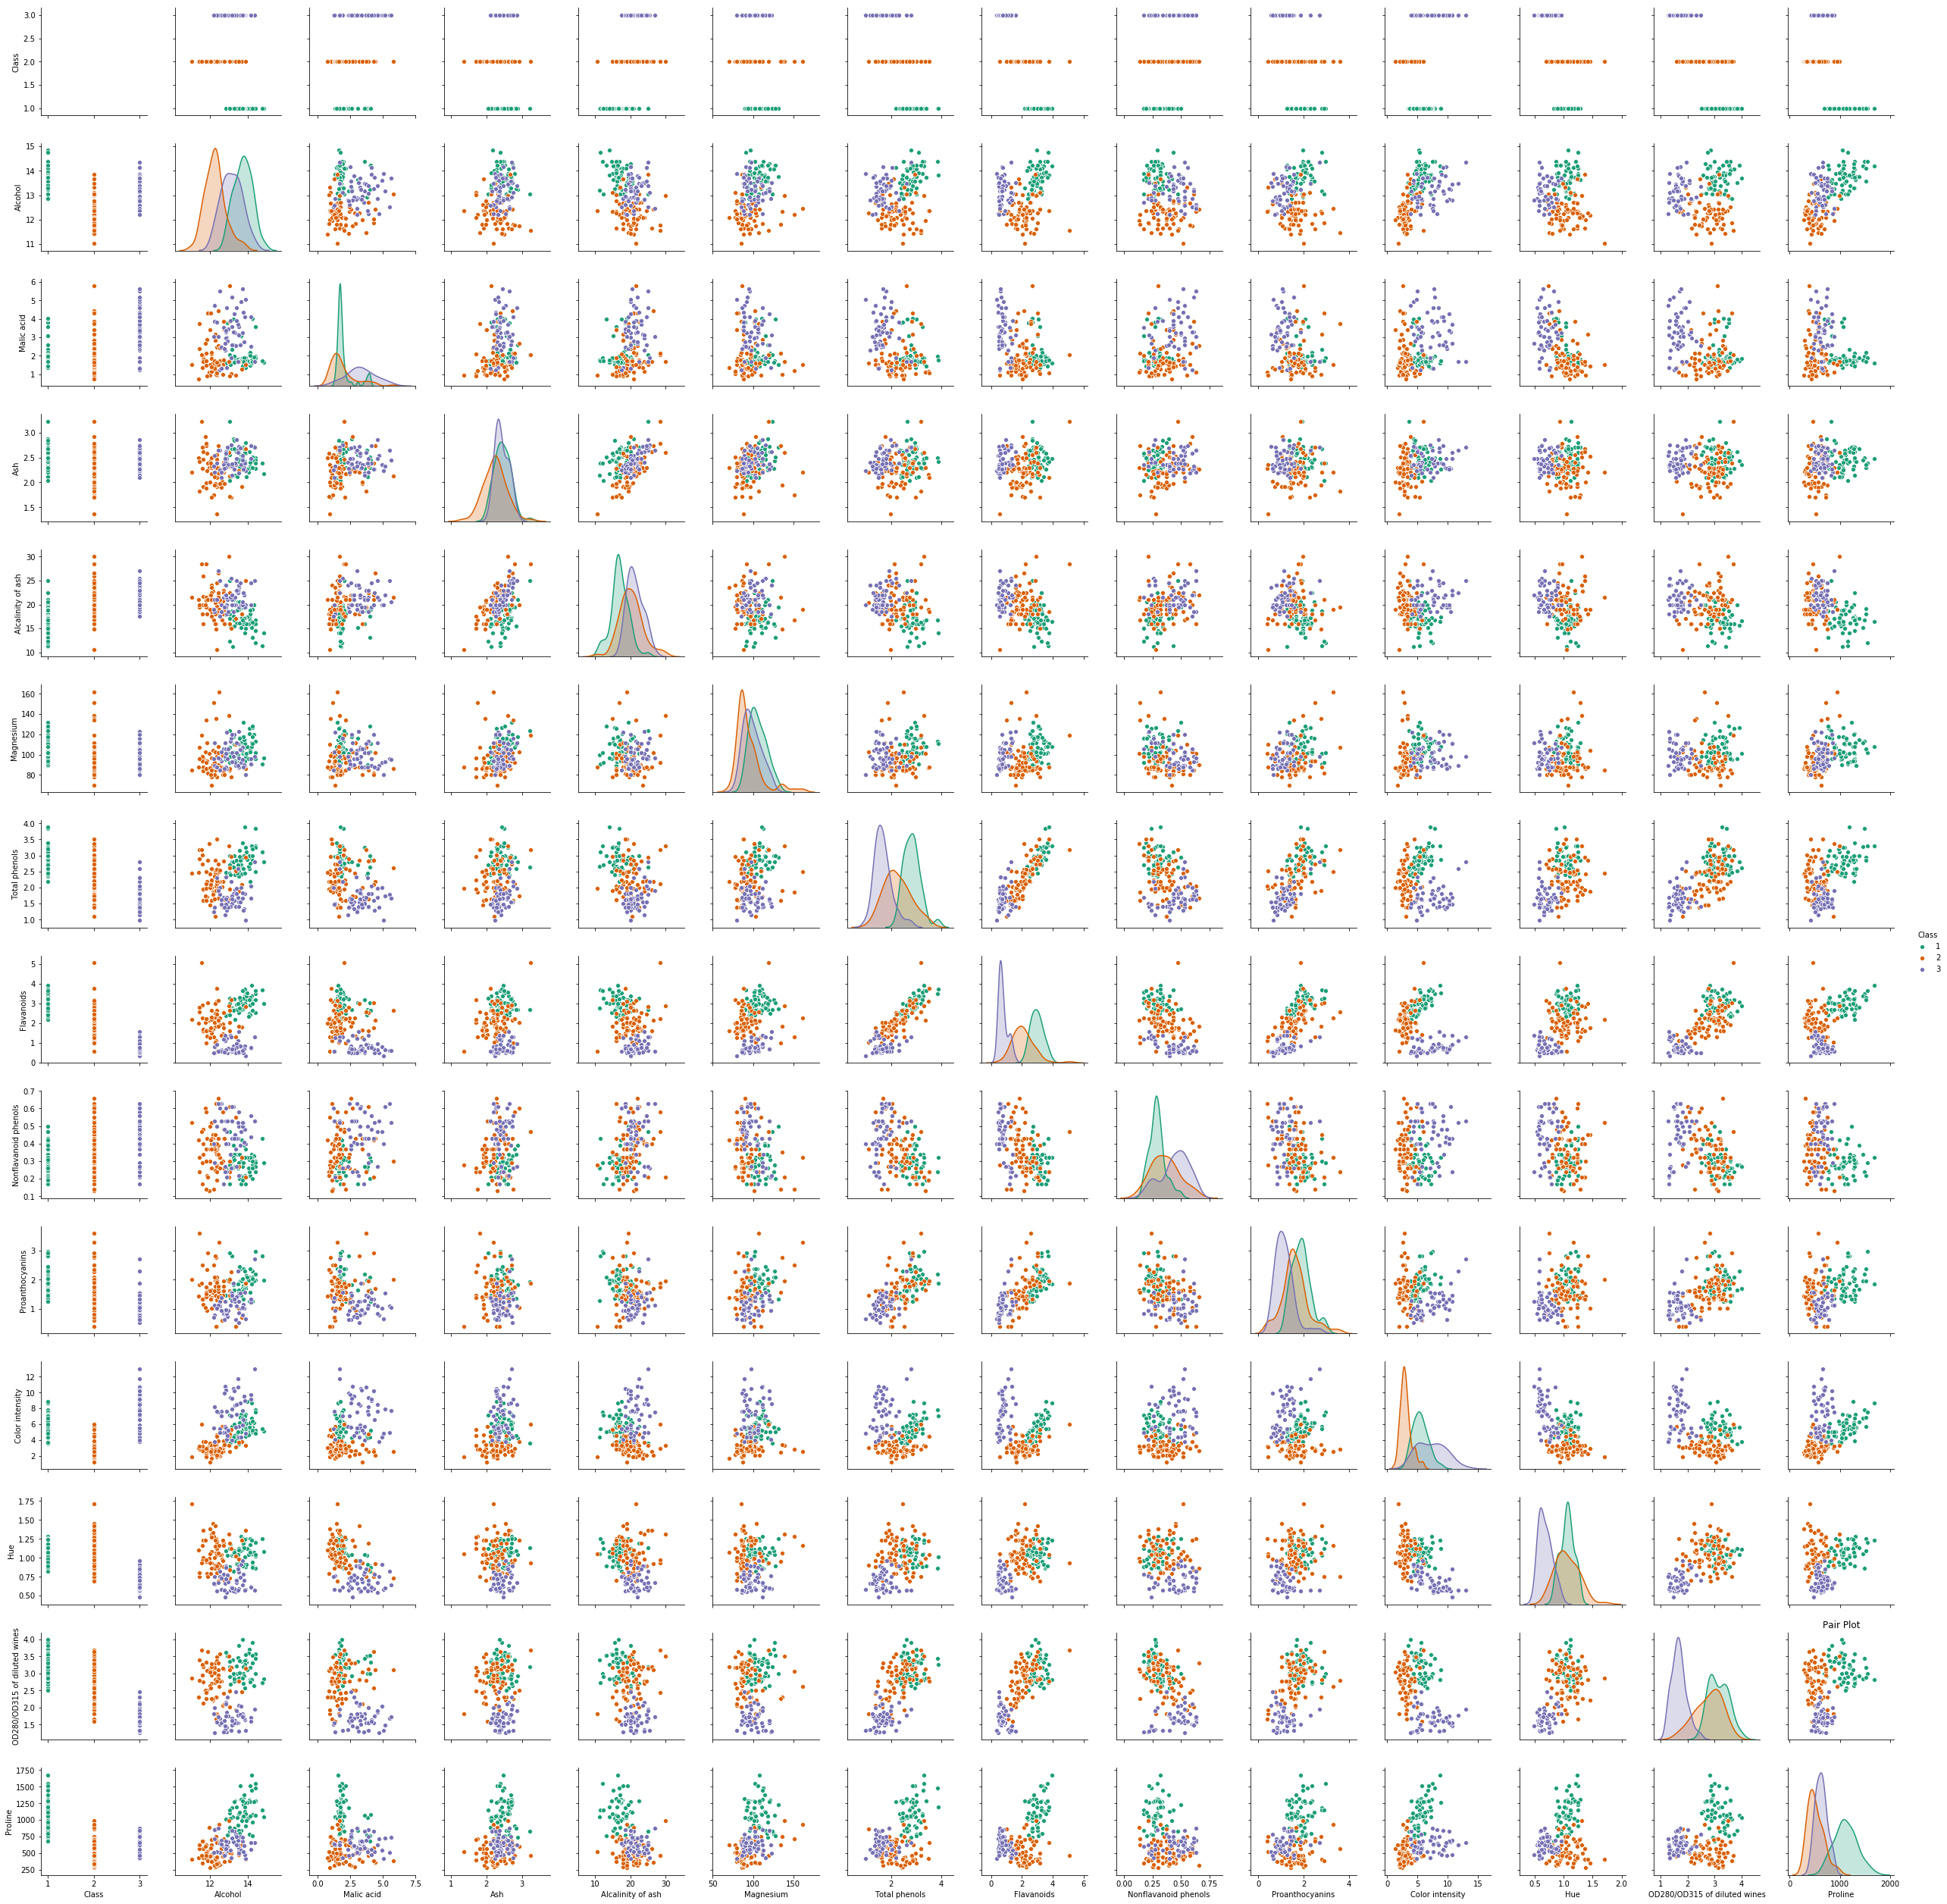

In [7]:
#Pairplot for correlation 

sns.pairplot(data=df, hue='Class', palette='Dark2')
plt.title('Pair Plot')

**Observations :**

- We can observe that we've some features with Strong positive Correlation & Some are having Negative Correlation.


- Pairplots reduce our work when it comes to Bivariate Analysis for Correlation observation.


- But one disadvantage is the pairplots can be nerve racking at times especially when number of features are more in our dataset.


- We'll identify the correlation by Heatmap.

Text(0.5, 1.0, 'Pearson Correlation')

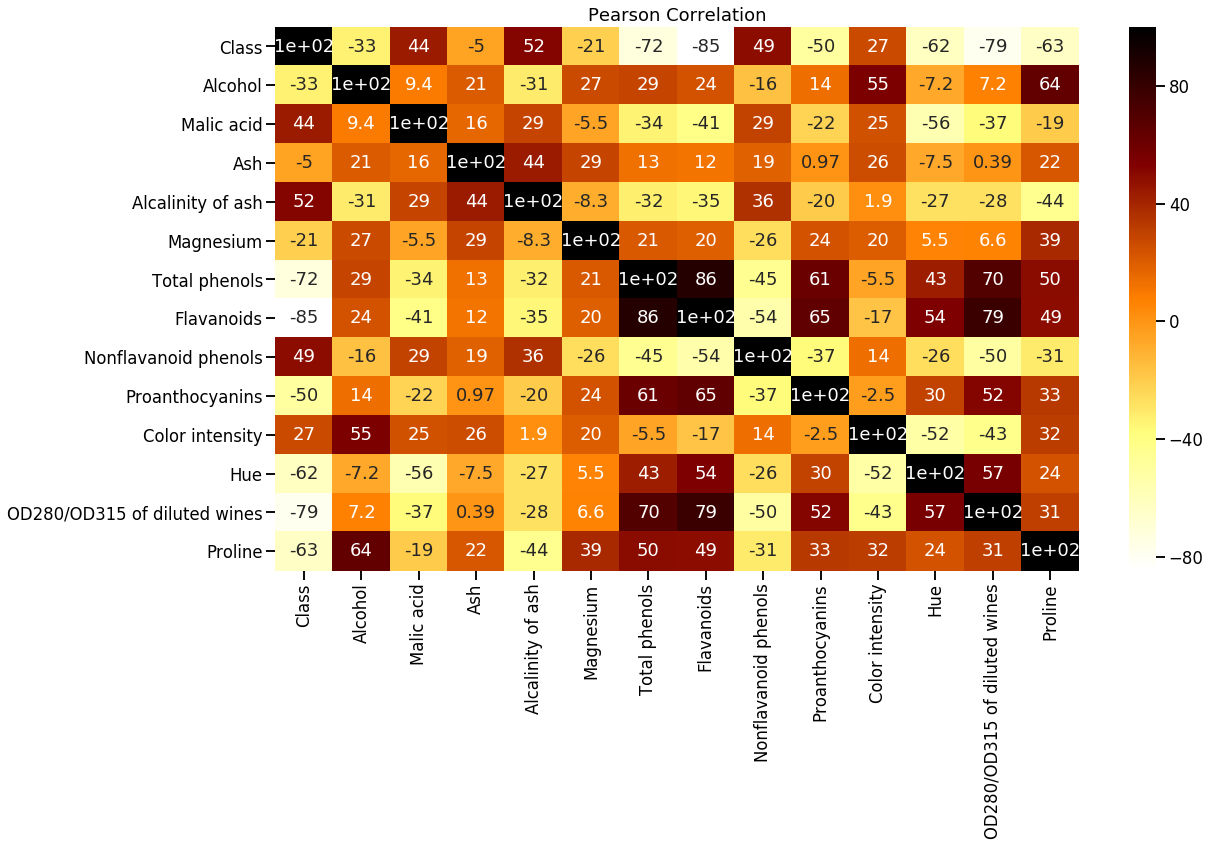

In [8]:
#Pearson Correlation (SCALED)

plt.figure(figsize=(18,10))
sns.set_context('talk')
sns.heatmap(df.corr()*100, annot=True, cmap='afmhot_r')
plt.title('Pearson Correlation')

**Observations :**

- We can observe that our Target Variable has strong Negative Correlation with Total Phenols, Flavanoids & OD280/OD315 of diluted wines.


- Total Phenols and Flavanoids are having Strong Positive Inter-Correlation with each other.


- Total Phenols and Flavanoids are also having Strong Positive Correlation with OD280/OD315 of diluted wines.


- Alcohol & Color Intensity are having Positive Correlation meaning As alcohol content increases the intensity of color increases too.


- Total Phenols & Flavanoids also increases Hue of Wine.


- We can drop one of the features of those which are Strongly Negative / Positive Correlated.

Text(0.5, 1.0, 'Target Class Count')

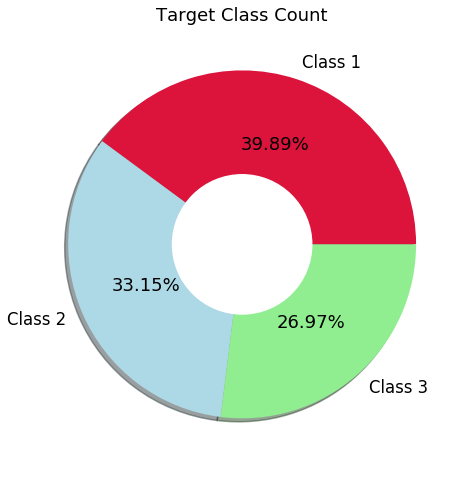

In [9]:
#Target Class count

plt.figure(figsize=(8,8))
plt.pie(df['Class'].value_counts(), labels=['Class 1','Class 2', 'Class 3'], autopct='%1.2f%%', shadow=True, 
        colors=['crimson','lightblue','lightgreen']
       )
my_circle = plt.Circle((0,0), 0.4, color='white')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Target Class Count')

- Above Target Class count tells us that we do not have Imbalanced Dataset.

([<matplotlib.axis.XTick at 0x7f7bc222f940>,
 <a list of 3 Text xticklabel objects>)

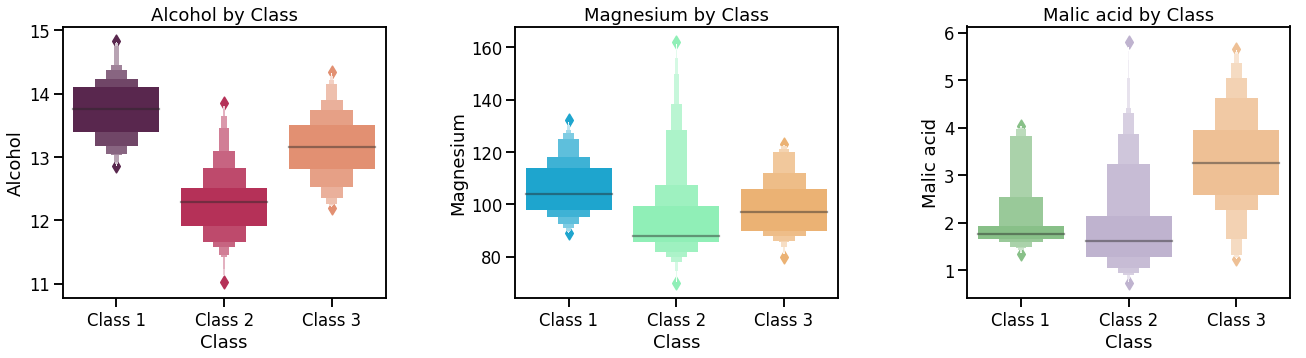

In [10]:
#eda I
#bivariate analysis

classes = ['Class 1', 'Class 2', 'Class 3']

plt.figure(figsize=(22,5))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

plt.subplot(1, 3, 1)
sns.boxenplot(df['Class'], df['Alcohol'], palette='rocket')
plt.title('Alcohol by Class')
plt.xticks(ticks=[0,1,2], labels=classes)

plt.subplot(1, 3, 2)
sns.boxenplot(df['Class'], df['Magnesium'], palette='rainbow')
plt.title('Magnesium by Class')
plt.xticks(ticks=[0,1,2], labels=classes)

plt.subplot(1, 3, 3)
sns.boxenplot(df['Class'], df['Malic acid'], palette='Accent')
plt.title('Malic acid by Class')
plt.xticks(ticks=[0,1,2], labels=classes)

**Observations :**

- **Fig. 1 :** We can observe that Class 1 Wines dominate other 2 in Alcohol content having the median somewhere between 13.5 to 14.


- **Fig. 2 :** It is also clear that Magnesium of Class one with its median values betwee 100-110 is dominating other 2 classes. But Some Wines in class 2 have magnesium reaching the peak of 150-160 - Few possible outliers.


- **Fig. 3 :** Considering Median values of Malic Acid , Class 3 Wines are dominating other 2. Malic acid is inversely proportional to Quality of Wine , i.e, Lesser is better.

([<matplotlib.axis.XTick at 0x7f7bc2158ac8>,
 <a list of 3 Text xticklabel objects>)

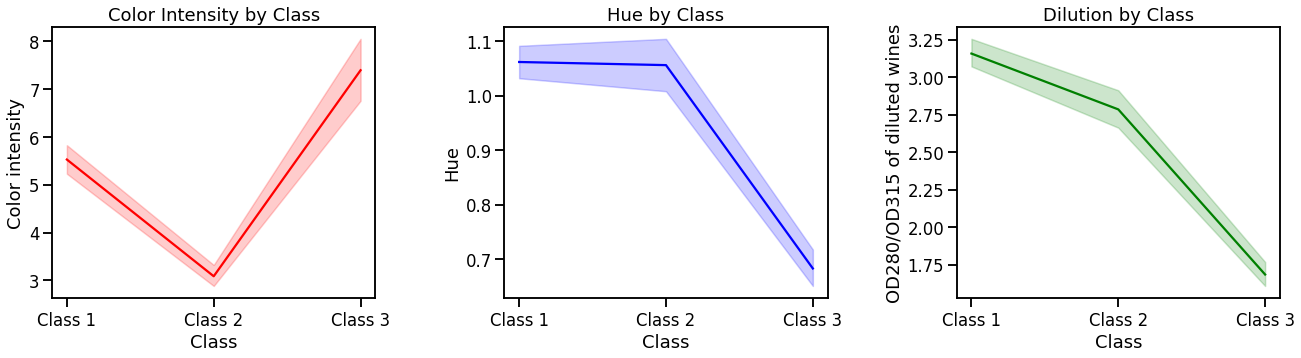

In [11]:
#eda II

plt.figure(figsize=(22,5))
plt.subplots_adjust(wspace=0.4, hspace=0.3)

plt.subplot(1, 3, 1)
sns.lineplot(df['Class'], df['Color intensity'], color='r')
plt.title('Color Intensity by Class')
plt.xticks(ticks=[1,2,3], labels=classes)

plt.subplot(1, 3, 2)
sns.lineplot(df['Class'], df['Hue'], color='b')
plt.title('Hue by Class')
plt.xticks(ticks=[1,2,3], labels=classes)

plt.subplot(1, 3, 3)
sns.lineplot(df['Class'], df['OD280/OD315 of diluted wines'], color='g')
plt.title('Dilution by Class')
plt.xticks(ticks=[1,2,3], labels=classes)

**Observations :**

- **Fig. 1 :** It is evident that color intensity is at it its peak reaching 7-8 for class 3. While Class 2 has color intensity 3, marking the lowest.


- **Fig. 2 :** We can see Class 1 & 2 has consistent hue lying between 1.0 to 1.1 while class 3 has lowest hue. Better the hue, better the Wine.


- **Fig. 3 :** Same is the case in case of Dilution , Class 3 wines are less diluted. 

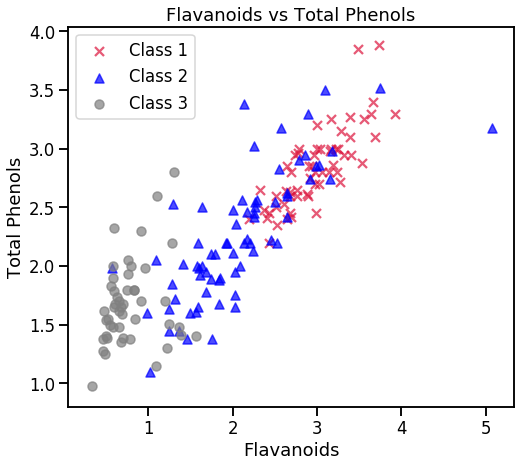

In [12]:
#scatter plot

plt.figure(figsize=(8,7))
for i, marker, color in zip(np.unique(df.Class), ('x','^','o'), ('crimson', 'blue', 'grey')):
    plt.scatter(x=df[df['Class'] == i]['Flavanoids'],
                y=df[df['Class'] == i]['Total phenols'], alpha=0.7, 
                color=color, marker=marker)
    plt.xlabel('Flavanoids')
    plt.ylabel('Total Phenols')
    plt.title('Flavanoids vs Total Phenols')
    plt.legend(labels=('Class 1', 'Class 2', 'Class 3'))

**Observations :**

- Above we can observe the Scatter plot for Total Phenols vs Flavanoids, which positively correlated.


- One more thing to observe is Class 2 Wines are quite disperesed across the plot. 

Text(0.5, 1.0, 'Class \nby its Flavanoid Content')

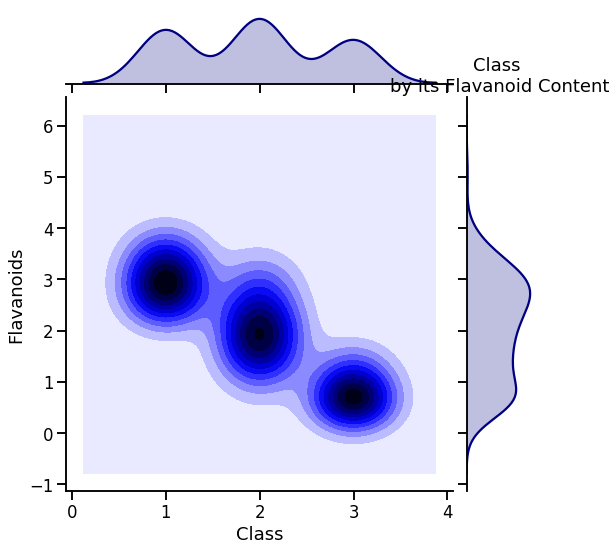

In [13]:
#KDE plot

sns.jointplot(df['Class'], df['Flavanoids'], kind='kde', color='navy', height=8)
plt.title('Class \nby its Flavanoid Content')

**Observations :**

- Above it is evident that how Flavanoid count is descending by Class.


- Class has Max. Flavanoid content while Class 3 has low.


- It States us that more the Flavanoid , better the Quality of Wine.

In [14]:
#Standardization (z-score normalization)

from sklearn.preprocessing import StandardScaler

x = df.drop('Class', axis=1)
y = df.Class

cols = x.columns

scaler = StandardScaler()

norm_df = scaler.fit_transform(x)
norm_df = pd.DataFrame(data=norm_df, columns=cols)
norm_df.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


- Above we had Z-Score normalized the data set to bring it to Gaussian distribution.

- We're forming a new dataset out of Normalized values by Labelling them.

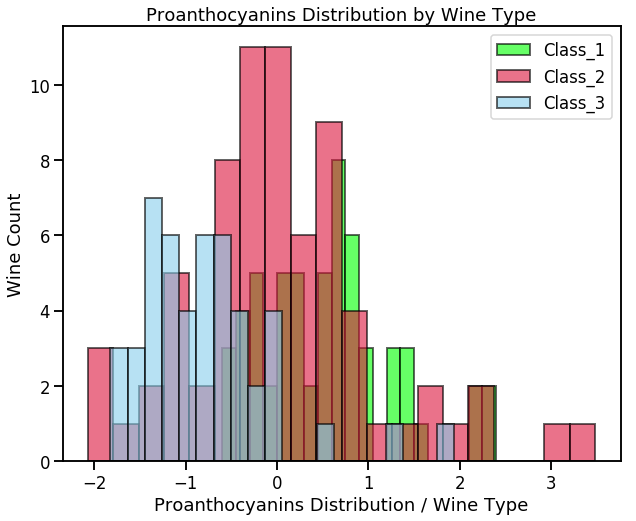

In [15]:
#eda III

class_1 = norm_df[y == 1]
class_2 = norm_df[y == 2]
class_3 = norm_df[y == 3]

kws = dict(edgecolor="black", linewidth=2, alpha=0.6)
#stats = '($\mu={:.2f}$, $\sigma={:.2f}$)'

sns.set_context('talk')
plt.figure(figsize=(10,8))
sns.distplot(class_1['Proanthocyanins'], bins=20, kde=False, hist_kws=kws, label='Class_1', color='lime')
sns.distplot(class_2['Proanthocyanins'], bins=20, kde=False, hist_kws=kws, label='Class_2', color='crimson')
sns.distplot(class_3['Proanthocyanins'], bins=20, kde=False, hist_kws=kws, label='Class_3', color='skyblue')
plt.title('Proanthocyanins Distribution by Wine Type')
plt.xlabel('Proanthocyanins Distribution / Wine Type')
plt.ylabel('Wine Count')
plt.legend(loc='upper right')

**Observations :**

- We can observe that Class 3 Wines are low on Proanthocyanins.


- While Class 1 and Class 2 wine are quite indistinguishable in case of Proanthocyanins distribution.


- Also we've few outliers for Class 2 Wines having Proanthocyanins values between 2.5 to 3.5. 

### Modelling


- Splitting 40% data for validation.


- As the goal of mine is to approach with Linear Discriminant Analysis we'll transform our dataset using it.


- Statistical Model's base estimator will be Logistic Regression.

In [16]:
#train test split & loading required metrics 

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

x_train, x_test, y_train, y_test = train_test_split(norm_df, y, test_size=.4, random_state=55)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((106, 13), (72, 13), (106,), (72,))

- After splitting Training & Validation set we've 106 examples for training and 72 for validation.

### Linear Discriminant Analysis

- Linear Discriminant Analysis is used for Classification problems.


- The main goal of LDA is to reduce dimensionality , just as we saw in PCA (Principal Component Analysis)


- But in LDA we fit both Predictors and Target making it a supervised algorithm while PCA is a unsupervised as it is not concerned about output.


- How LDA Works ?
    - Main purpose of LDA is to Reduce the distance between Data points within the Class , in short bringing them close to each other. It is called **Within Class Scatter Matrix (Sw).**
    - Along with minimizing the distance within class data points LDA also focused on increasing the distance between mean of different classes. By this our classes lie far from each other as possible while retaining as much as information as possible , i.e, **Between Class Scatter Matrix (Sb).**
    
![alt text](https://sebastianraschka.com/images/blog/2014/linear-discriminant-analysis/lda_1.png)<br>


- In dimensionality reduction Process, LDA is based on Eigen Values & Eigen Vector , i.e, **A.V1 = λ.V1**. Where **A** is **Input matrix (input data)**, **V1** is **Eigen Vector.** While, **λ** is **Eigen value** obtained by removing Commonality from Eigen vector after performing **A.V1**


- Why we provide Target variable to LDA ?
    - Because LDA wants to maximize the distance between Classes.

In [0]:
#Implementation of Linear Discriminant Analysis

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=None).fit(x_train, y_train)

#transforming traning and validation set
lda_train_trans = lda.transform(x_train)
lda_test_trans = lda.transform(x_test)

- Above we had fitted training set to LDA while transforming values of Training as well as validation set.


- LDA will decompose the dimensionality. We're mentioning n_components to None , i.e, Automatic selection of components.

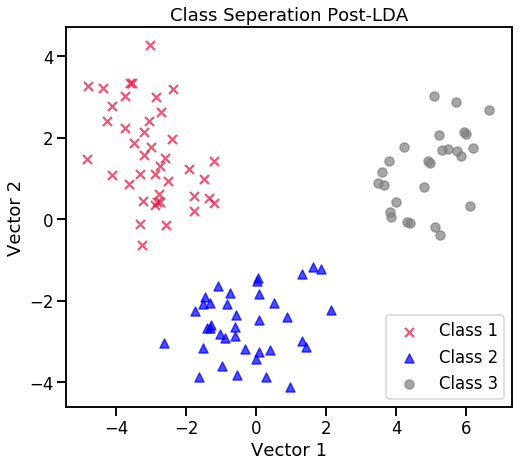

In [18]:
#Post-LDA analysis

plt.figure(figsize=(8,7))
for i, marker, color in zip(np.unique(df.Class), ('x','^','o'), ('crimson', 'blue', 'grey')):
    plt.scatter(x=lda_train_trans[:, 0][y_train == i],
                y=lda_train_trans[:, 1][y_train == i], alpha=0.7, 
                color=color, marker=marker)
    plt.xlabel('Vector 1')
    plt.ylabel('Vector 2')
    plt.title('Class Seperation Post-LDA')
    plt.legend(labels=('Class 1', 'Class 2', 'Class 3'))

- Above plot depicts seperation of classes post-LDA , i.e, by **Maximizing the distance between classes (Sb) and Minimizing the withing class distance (Sw).**

### Logistic Regression

- Logistic Regression is a better approach. It is not complex.


- Better feature enginnering can produce better outputs.

In [0]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

reg_est = LogisticRegression(multi_class='auto', solver='lbfgs').fit(lda_train_trans, y_train)
pred = reg_est.predict(lda_test_trans)
#pred

- In here we're using **multi_class** parameter as we've 3 Classes.


- We're going with solver as "lbfgs" since it works better on small datasets. And they tend to perform better with Multi-Class.


- Further we're implementing Accuracy Score, Cross validation , Classification report & Confusion Matrix for our evaluation.

Accuracy Score : 1.0
Cross Validation Score :  0.982213438735178
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        18
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        21

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



Text(0.5, 1.0, 'Confusion Matrix')

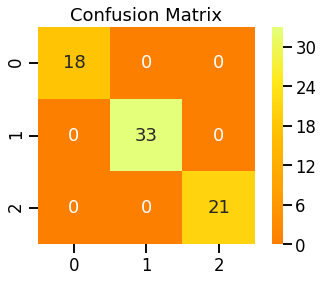

In [20]:
#Metrics evaluation

print ('Accuracy Score :', accuracy_score(y_test, pred))
print ('Cross Validation Score : ', cross_val_score(reg_est, x_train, y_train, cv=5).mean())
print (classification_report(y_test, pred))

sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap='Wistia_r', square=True)
plt.title('Confusion Matrix')

**Observations :**

- **Accuracy Score :** We've got excellent Accuracy of 100% (Scaled).


- **Cross-Validation Score :** Cross-Val Score differs by 2% (Scaled) with Accuracy Score. In statistical literature it is said that 2-3% difference is fair enough.


- **Classification Report :** We got excellent Recall Score. The weightage is similar for each class.


- **Confusion Matrix :** We can see all the examples are classified correctly. With no error.  

**Conclusion :**

- We accomplished our goal by performing Linear Discriminant Analysis with detailed explaination.


- Also, we classified the wine types correctly by implementation of Logistic Regression.

**References :**

- **Link 1 :** https://sebastianraschka.com/Articles/2014_python_lda.html


- **Link 2 :** https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html